In [ ]:
!pip install pyResearchInsights

In [ ]:
!pip uninstall -y numpy
!pip uninstall -y setuptools
!pip install setuptools
!pip install numpy

In [ ]:
!pip install csv


ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv


In [ ]:
from pyResearchInsights.common_functions import pre_processing
from pyResearchInsights.Scraper import scraper_main
from pyResearchInsights.Cleaner import cleaner_main
from pyResearchInsights.Analyzer import analyzer_main
from pyResearchInsights.NLP_Engine import nlp_engine_main

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
'''Abstracts with these keywords will be retrieved from Springer'''
keywords_to_search = 'Specific tension of whole human muscle'

'''Declaring the number of topics to generated by the NLP_Engine'''
num_topics = 20

'''Declaring the number of keywords to be presented in the frequency/weight plots'''
num_keywords = 5

In [ ]:
# !rm -rf LOGS
!rm /content/LOGS/LOG_2023-09-20_15_31_Specific_tension_of_whole_human_muscle/*.png

In [ ]:
import csv

def extract_abstracts(input_csv_file, output_txt_file):
    try:
        # Open the CSV file for reading
        with open(input_csv_file, 'r', newline='',encoding='ISO-8859-1') as csv_file:
            # csv_reader = csv.reader(csv_file)
            csv_reader = csv.DictReader(csv_file)

            # Open the text file for writing
            with open(output_txt_file, 'w', encoding='utf-8') as txt_file:
                for row in csv_reader:
                    # Assuming the abstract is in the second column (index 1)
                    abstract = row['Abstract']
                    # Write the abstract to the text file
                    txt_file.write(abstract + '\n\n')  # Add a line space between abstracts

        print("Abstracts extracted and saved to", output_txt_file)
    except Exception as e:
        print("An error occurred:", str(e))

# Example usage:
input_csv_file = '/content/review_243232_irrelevant_csv_20230909042812_processed.csv'  # Replace with your CSV file name
output_txt_file = '/content/LOGS/LOG_2023-09-20_15_31_Specific_tension_of_whole_human_muscle/Abstract_Database_2023-09-20_15_31_ANALYTICAL1.txt'  # Replace with your desired output file name
extract_abstracts(input_csv_file, output_txt_file)

Abstracts extracted and saved to /content/LOGS/LOG_2023-09-20_15_31_Specific_tension_of_whole_human_muscle/Abstract_Database_2023-09-20_15_31_ANALYTICAL1.txt


In [ ]:
'''The pre_processing() function creates the log folder where the abstracts will be stored and the status_logger'''
# abstracts_log_name, status_logger_name = pre_processing(keywords_to_search)

'''Here, we use scraper_main() to retrieve the abstracts'''
# scraper_main(keywords_to_search, abstracts_log_name, status_logger_name)



[INFO]15:49:22 Entering the Cleaner module
[INFO]15:49:22 Converting text to list
[INFO]15:49:22 Converted text to list
[INFO]15:49:22 Generating list with special elements for weeding out later
[INFO]15:49:22 Generated list with special elements for weeding out later
[INFO]15:49:22 Removing elements with special characters from the text list
[INFO]15:49:22 Removed elements with special characters from the text list
[INFO]15:49:22 Dumping the cleaned abstract .txt to the disc
[INFO]15:49:22 Dumped the cleaned abstract .txt to the disc
[INFO]15:49:22 Exiting the Cleaner module
[INFO]15:49:22 Entered the Analyzer.py code.
[INFO]15:49:22 Carrying out pre-processing functions for analyzer
[INFO]15:49:22 Carried out pre-processing functions for analyzer
[INFO]15:49:22 Copying data from LOGS/LOG_2023-09-20_15_31_Specific_tension_of_whole_human_muscle/Abstract_Database_2023-09-20_15_31_CLEANED.txt to pandas dataframe
[INFO]15:49:22 Cleaning the list of words generated
[INFO]15:49:22 Cleaned t

0

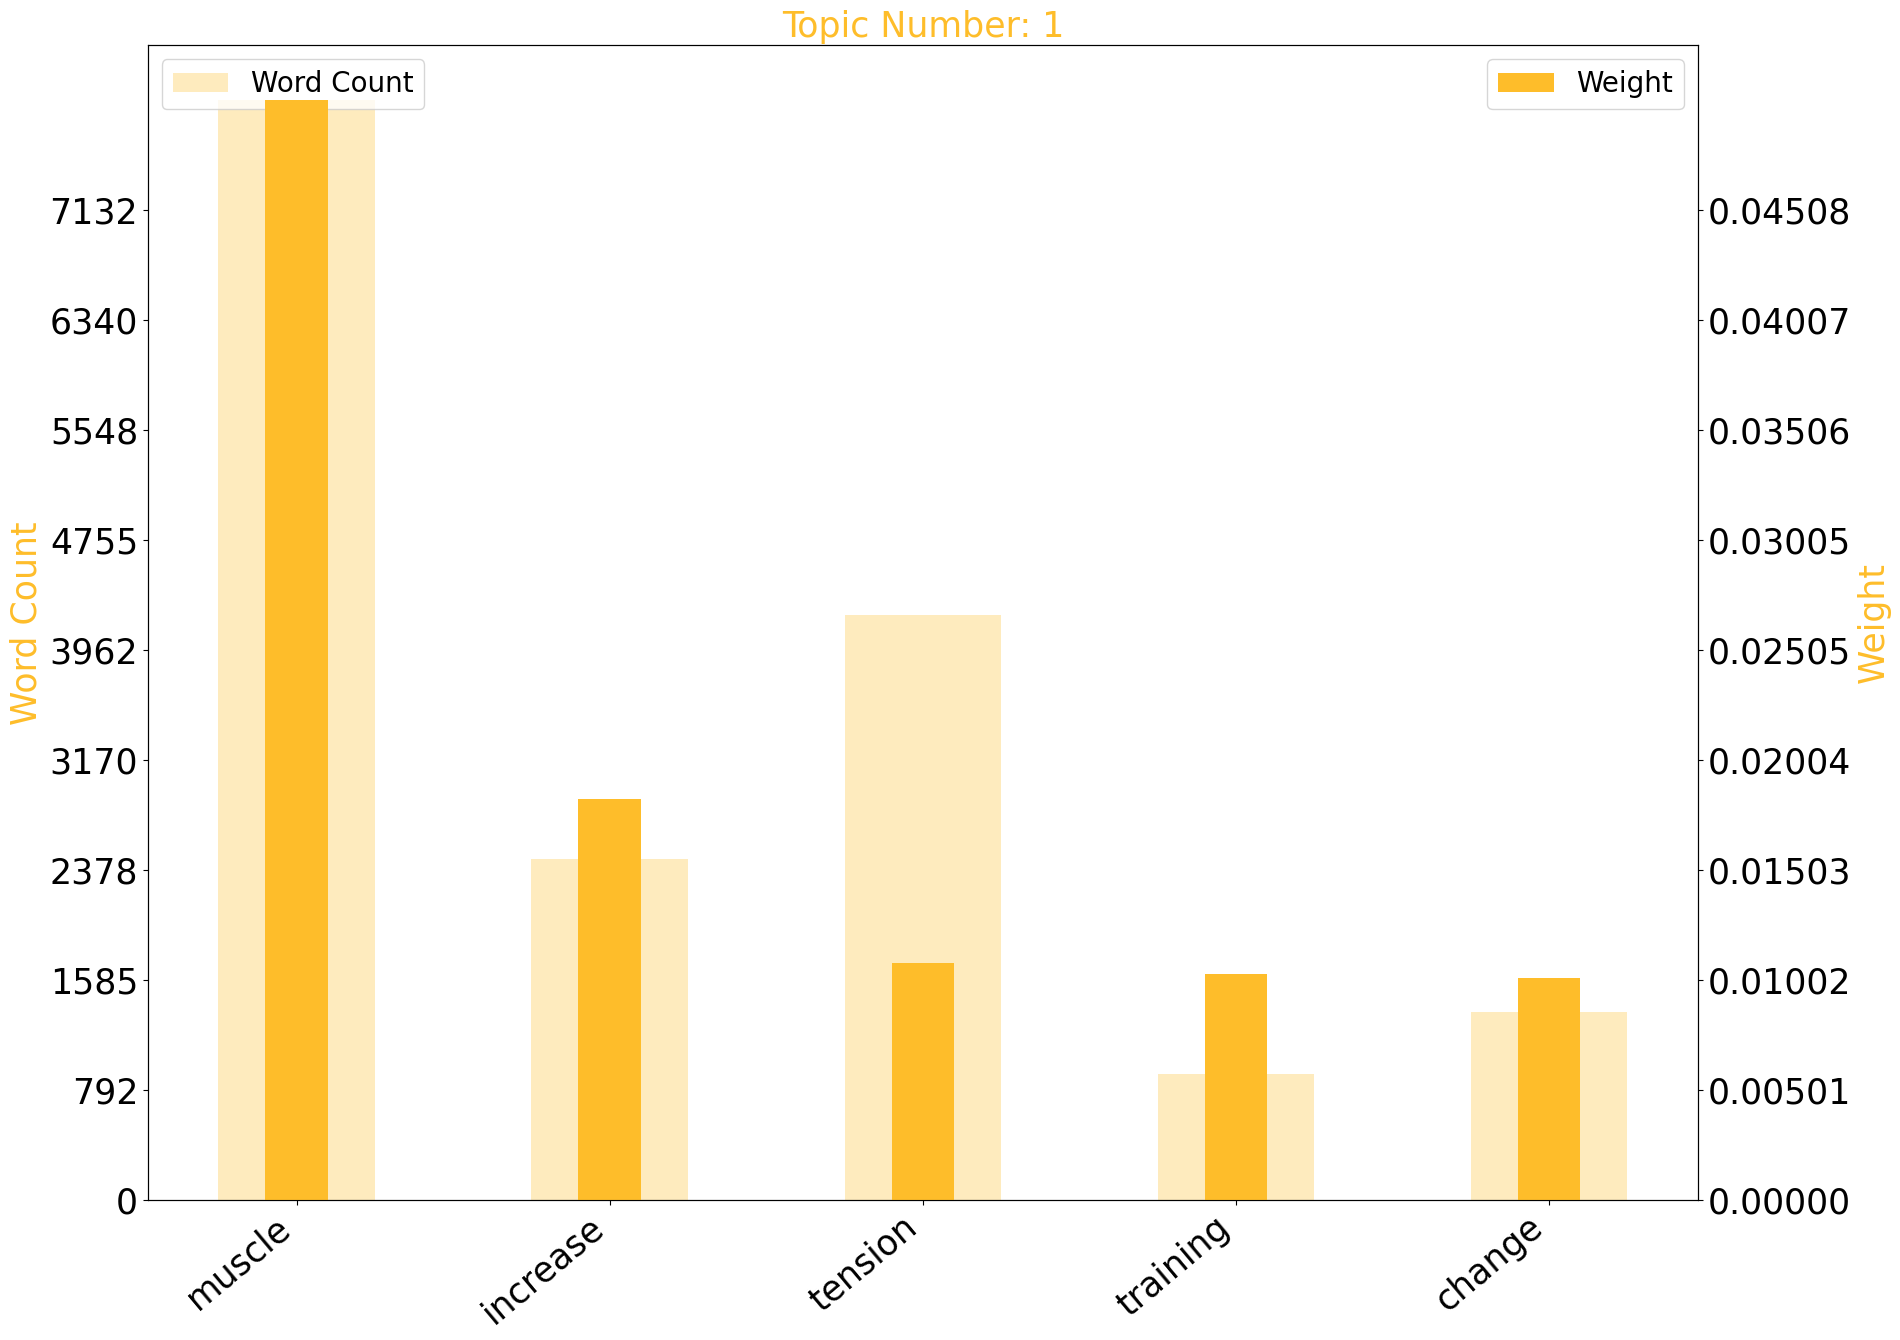

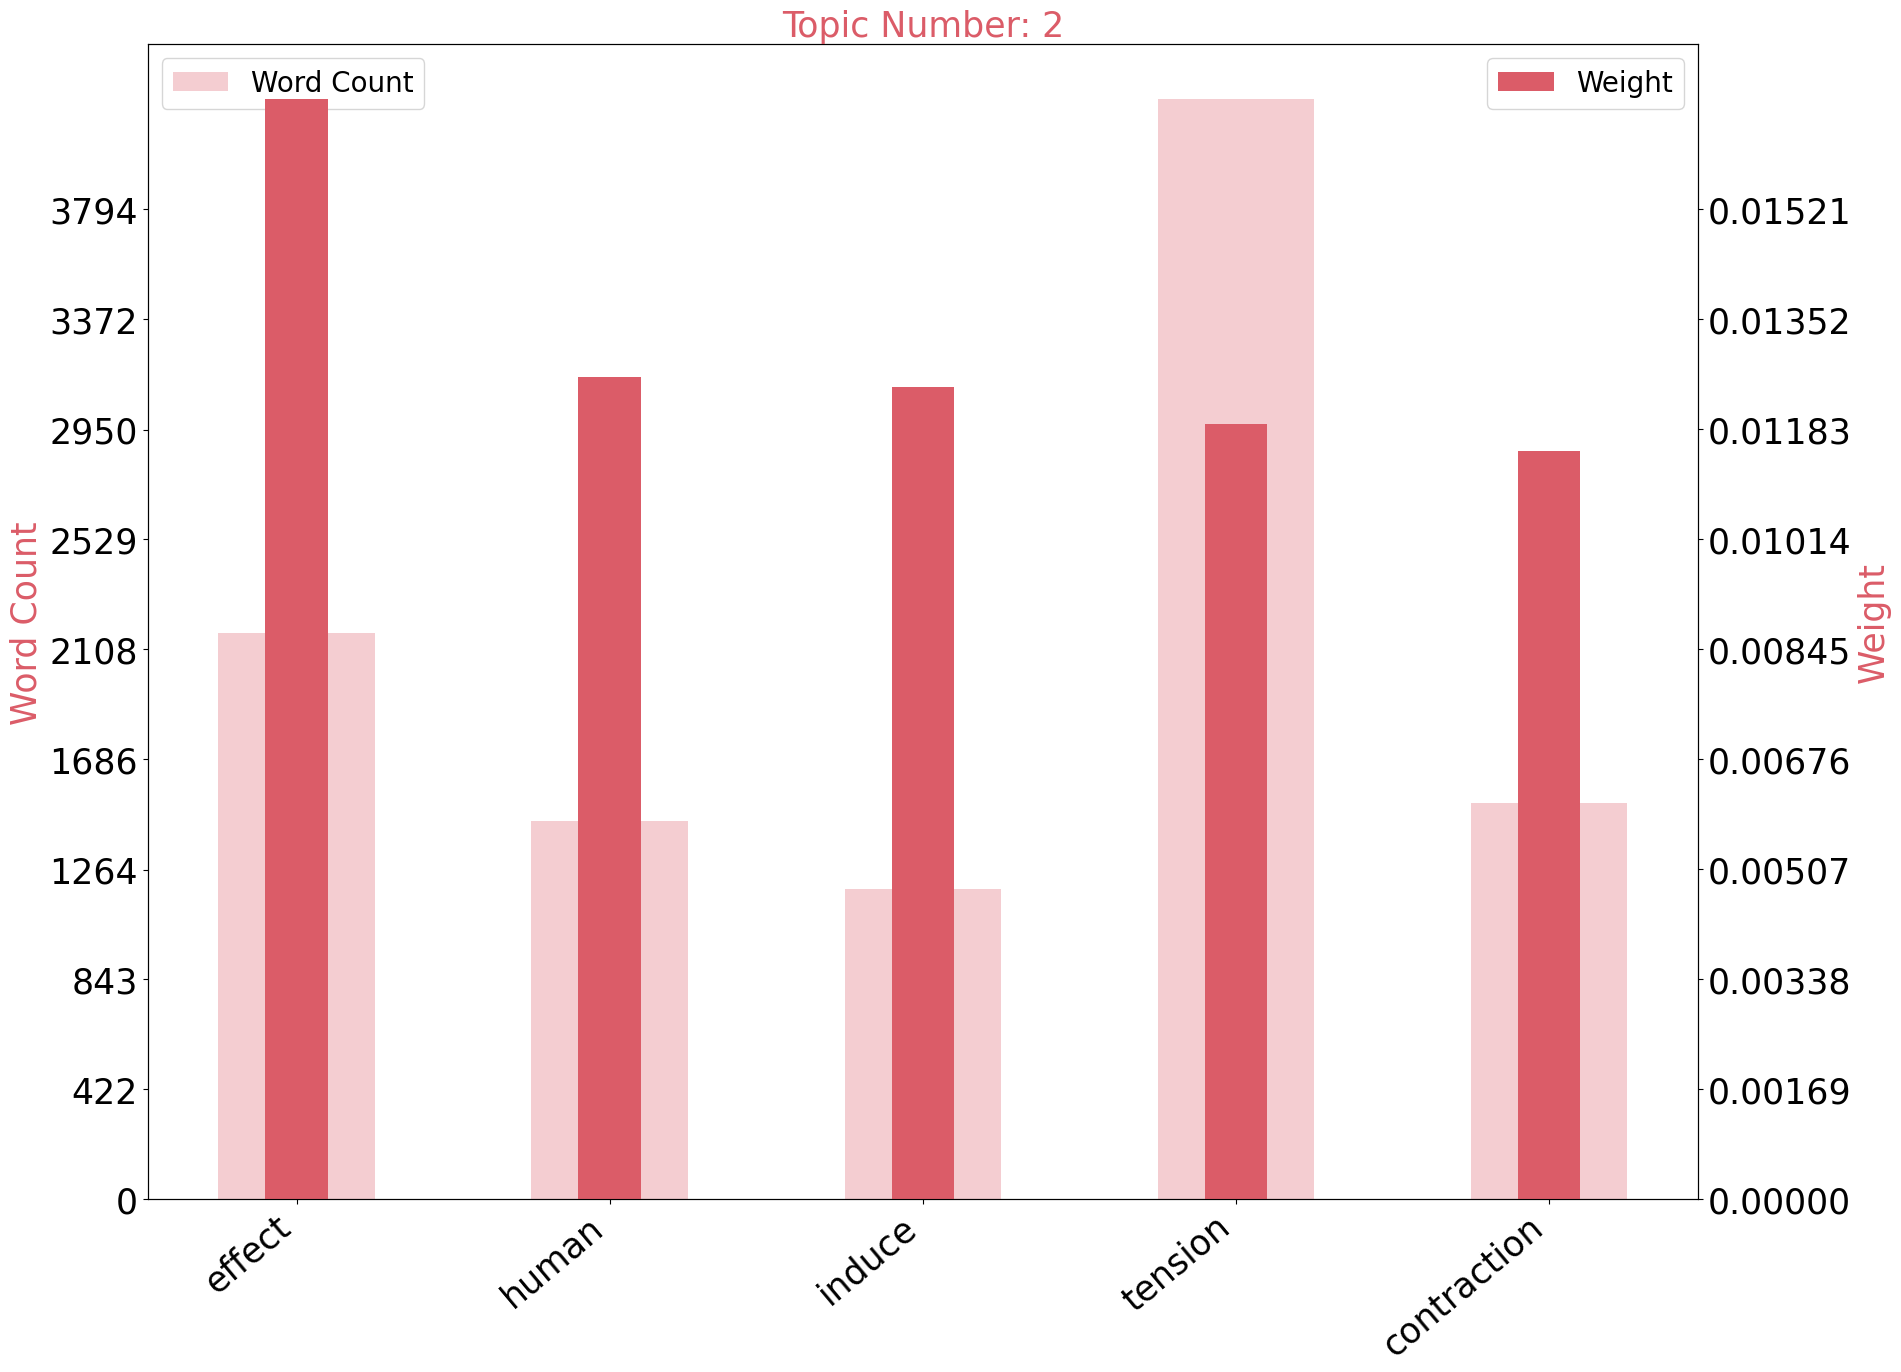

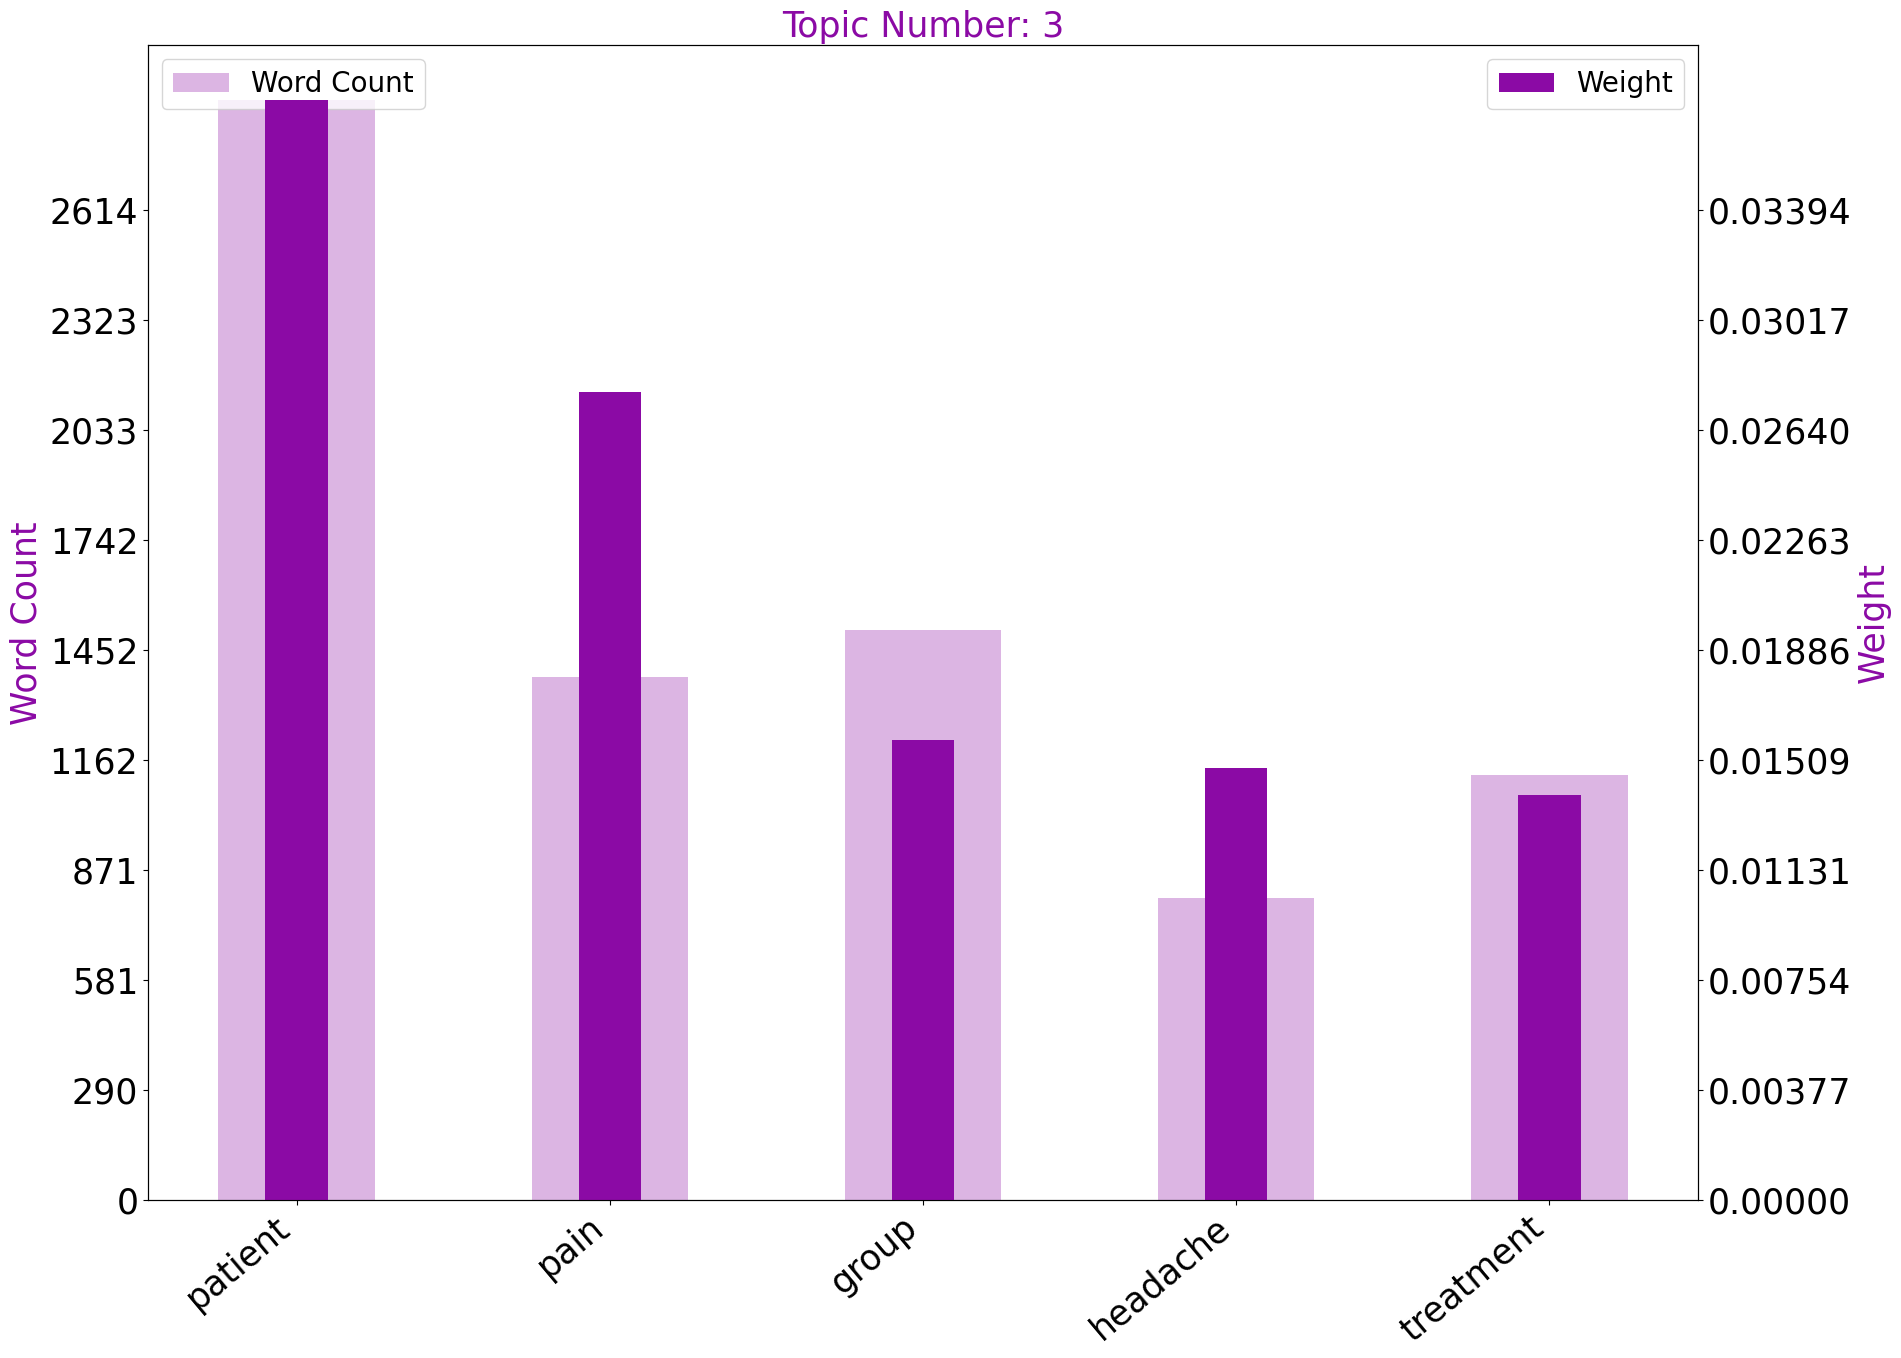

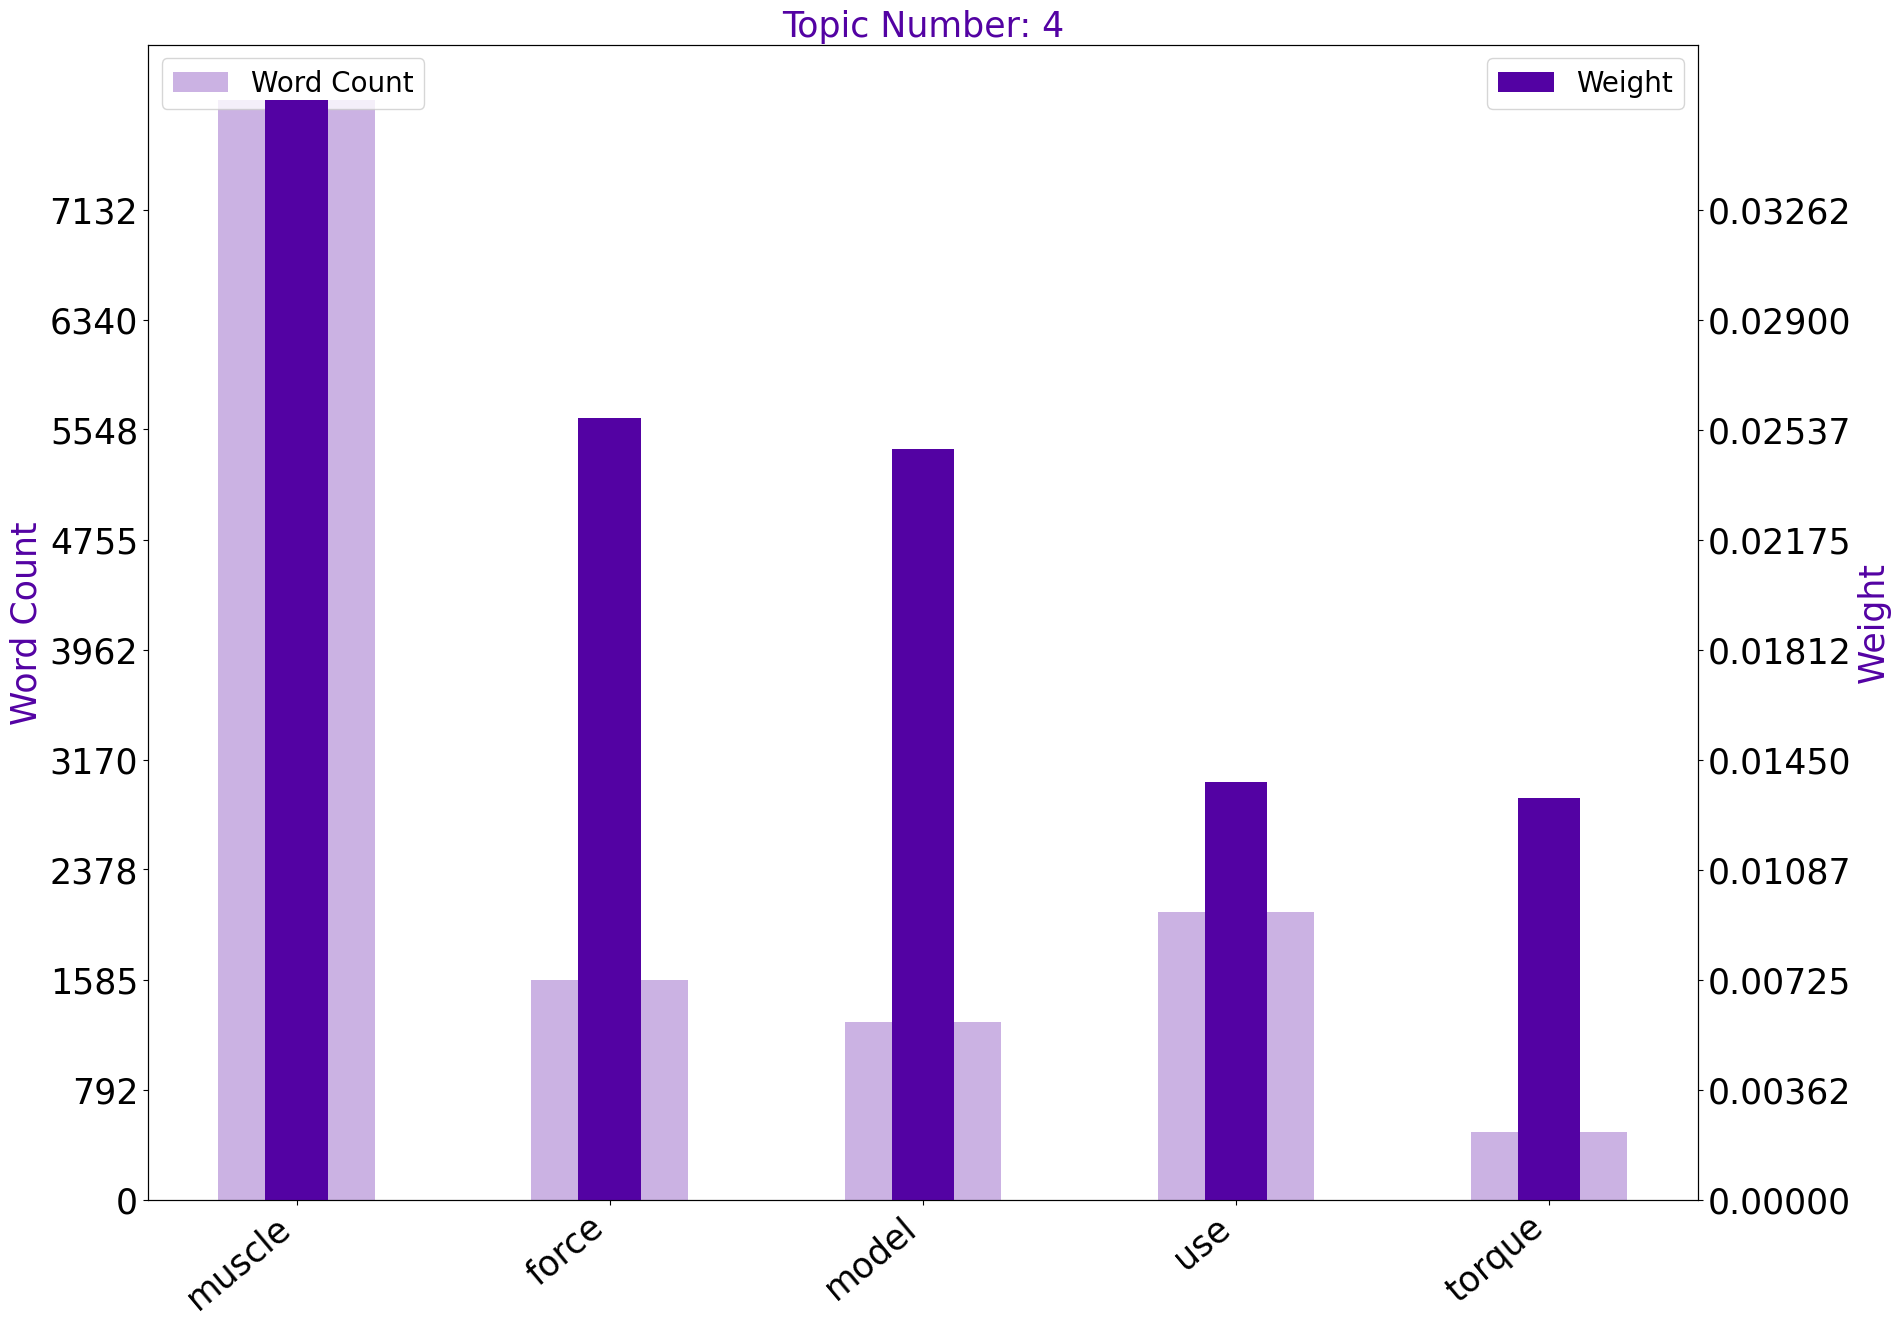

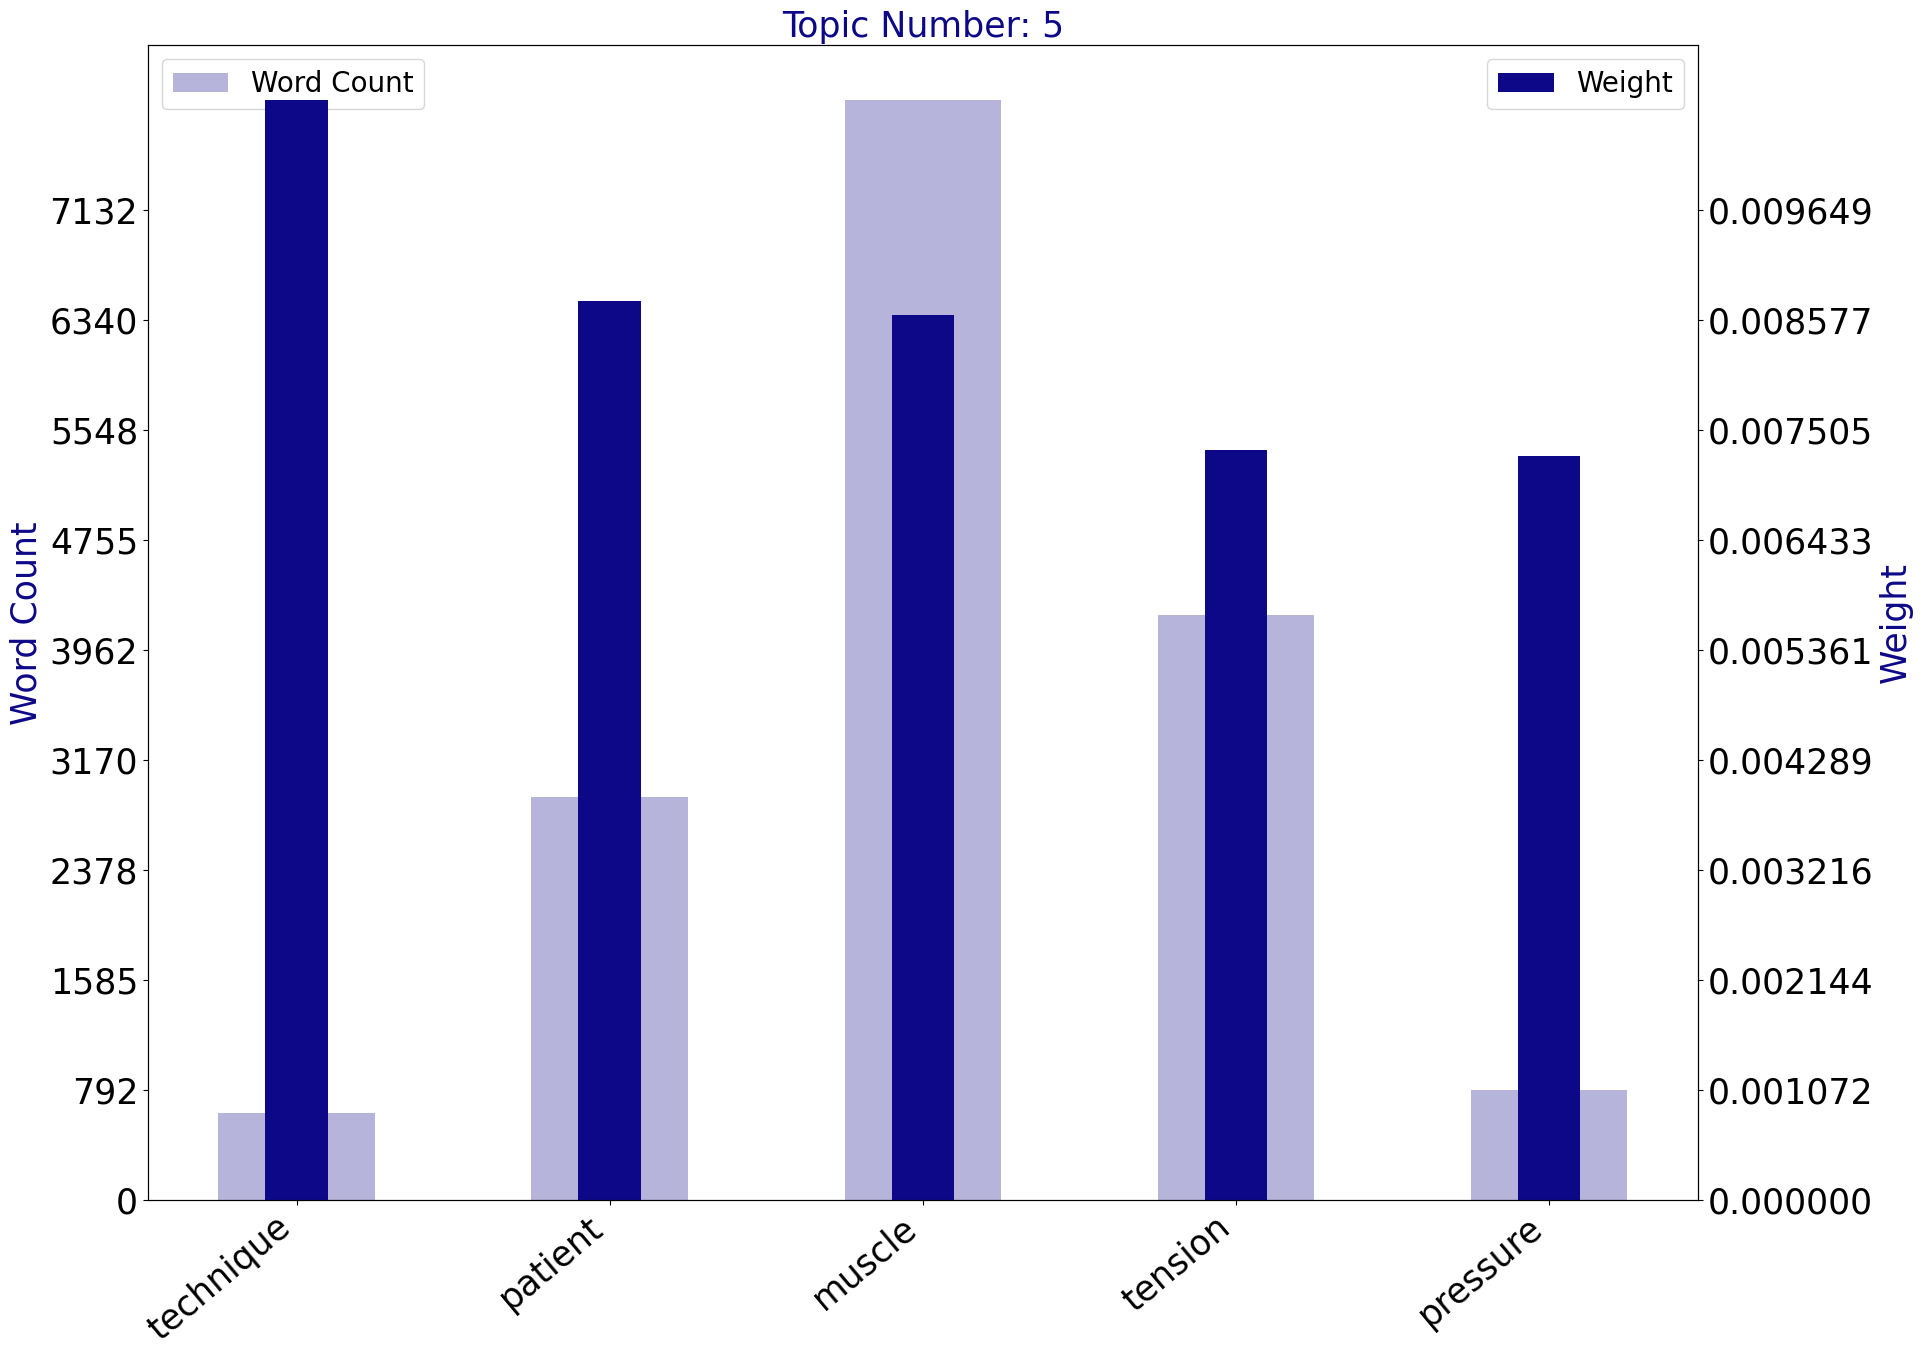

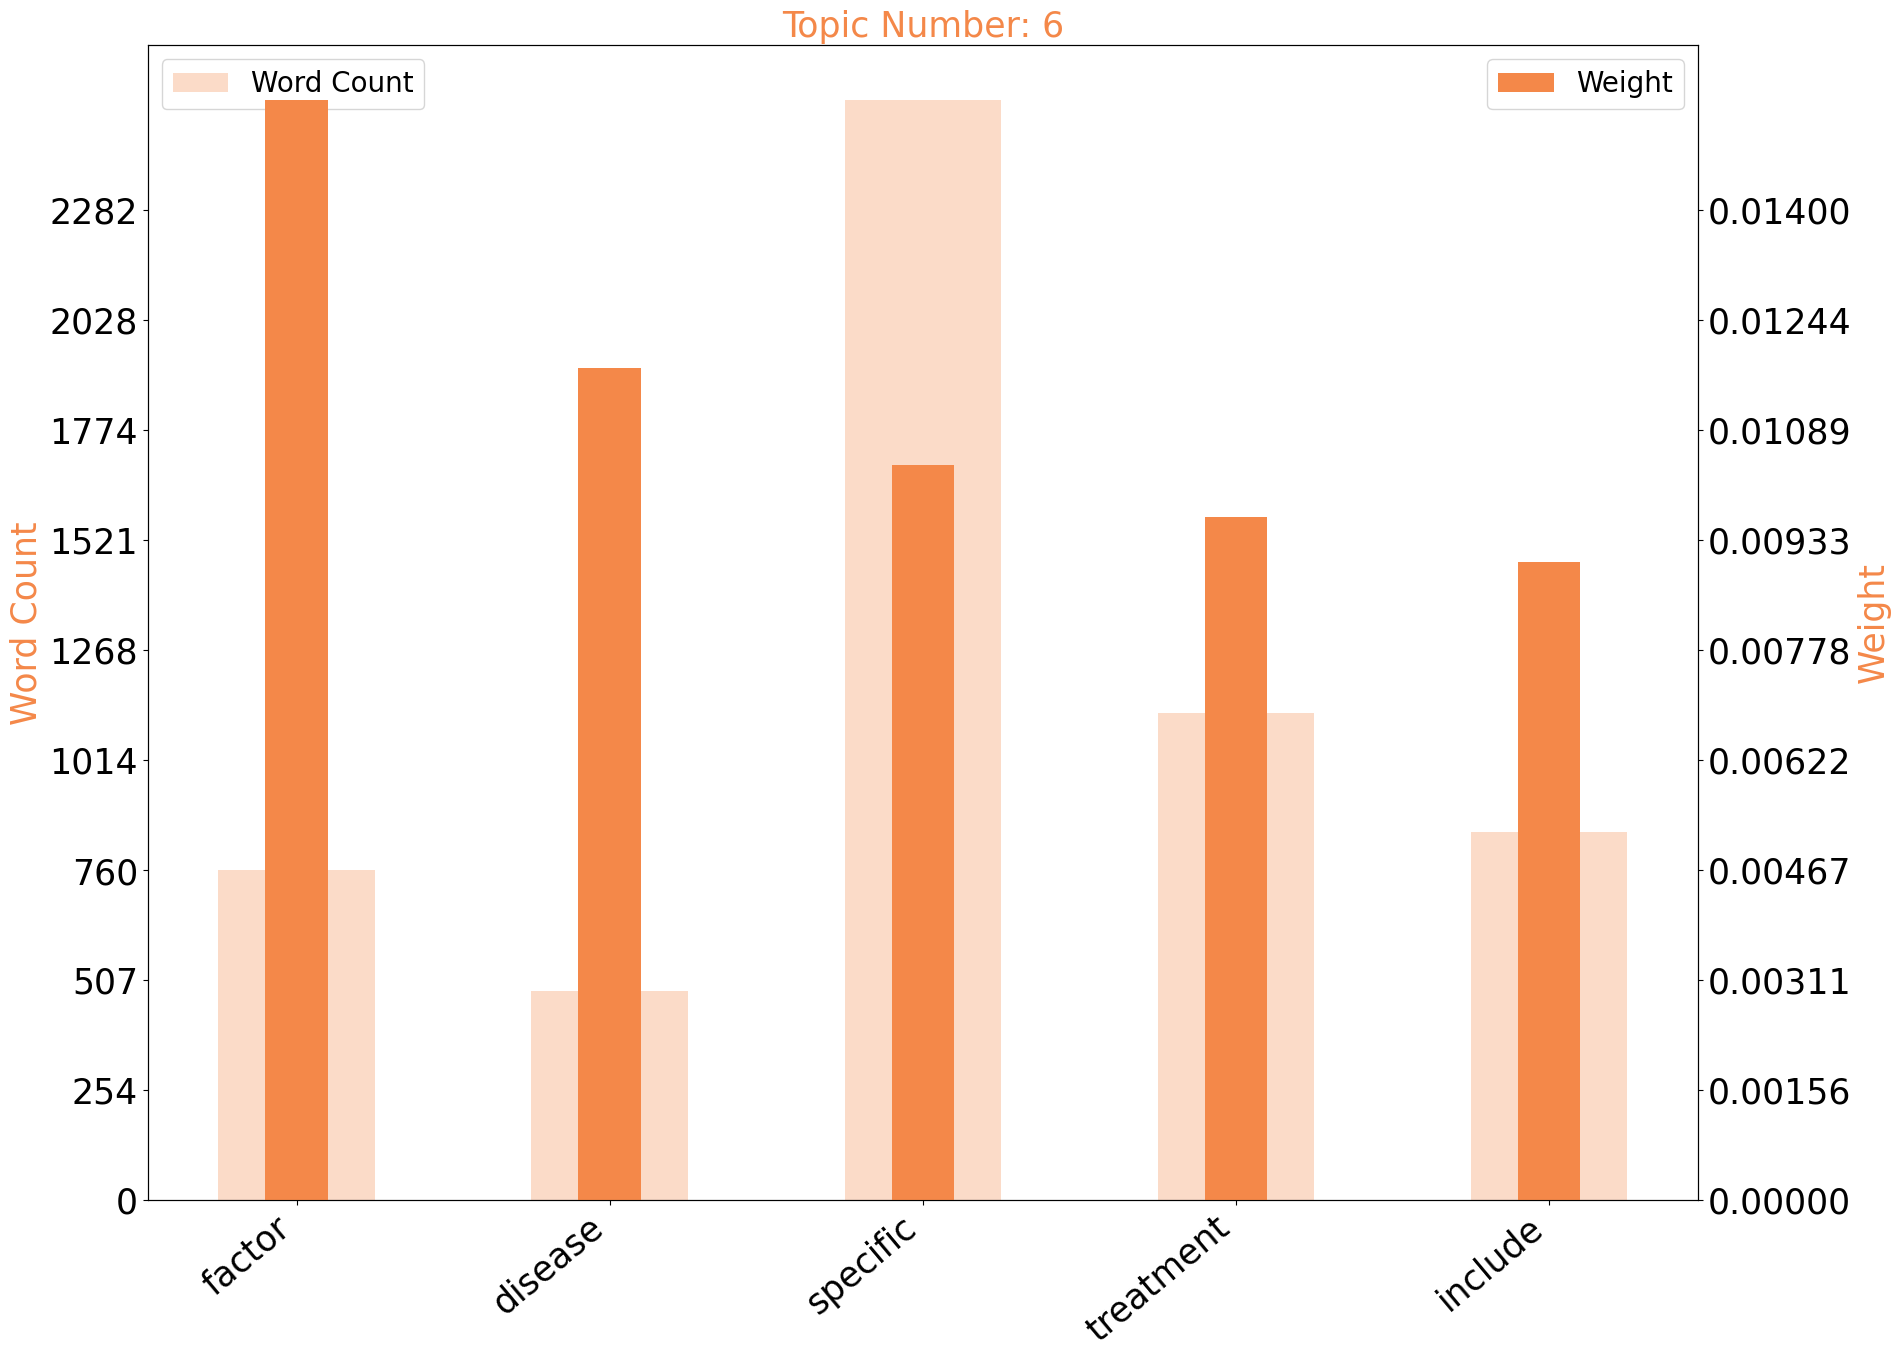

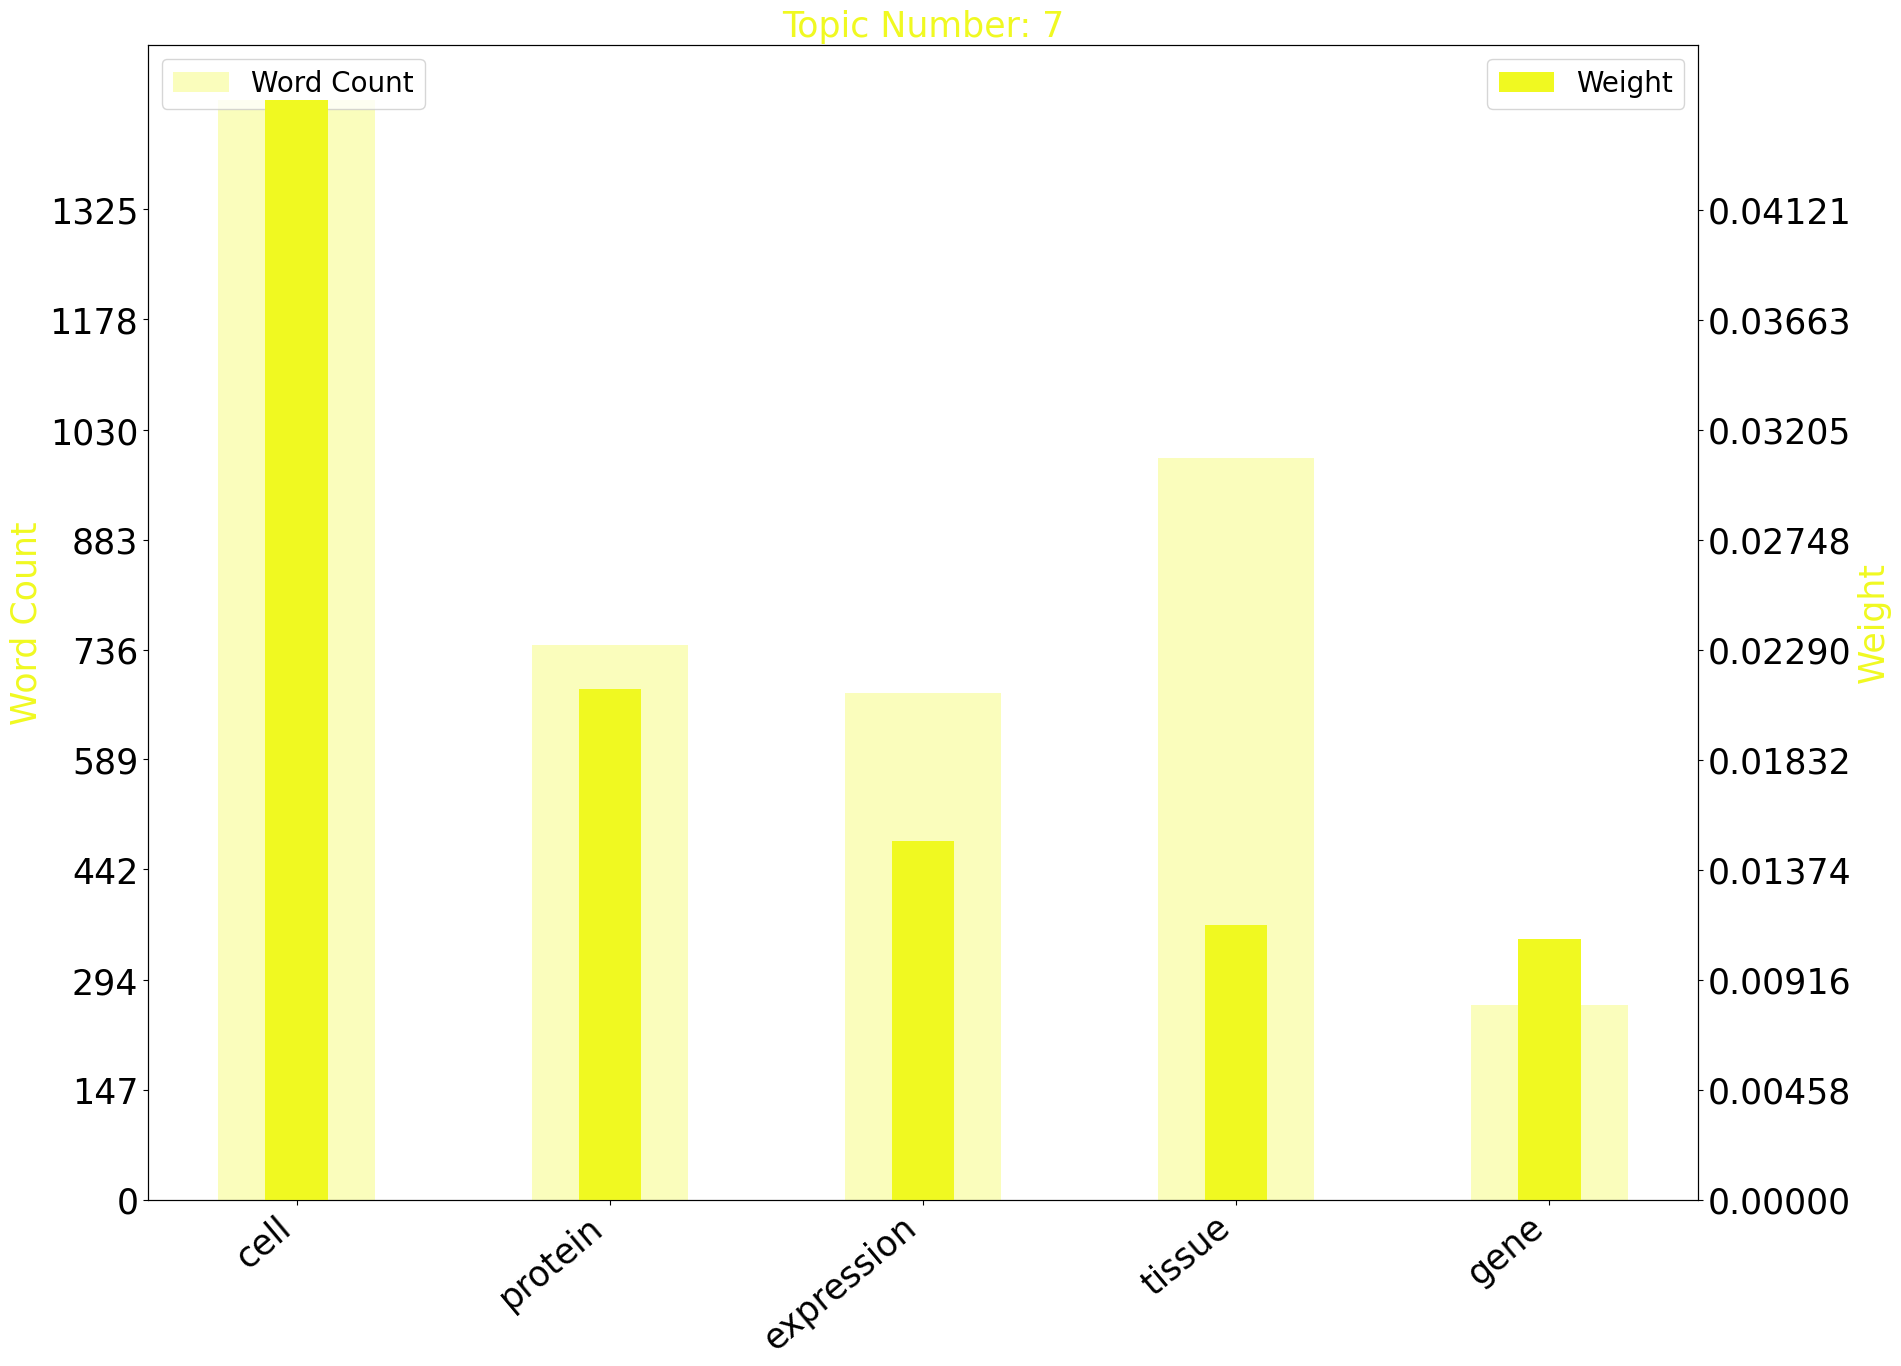

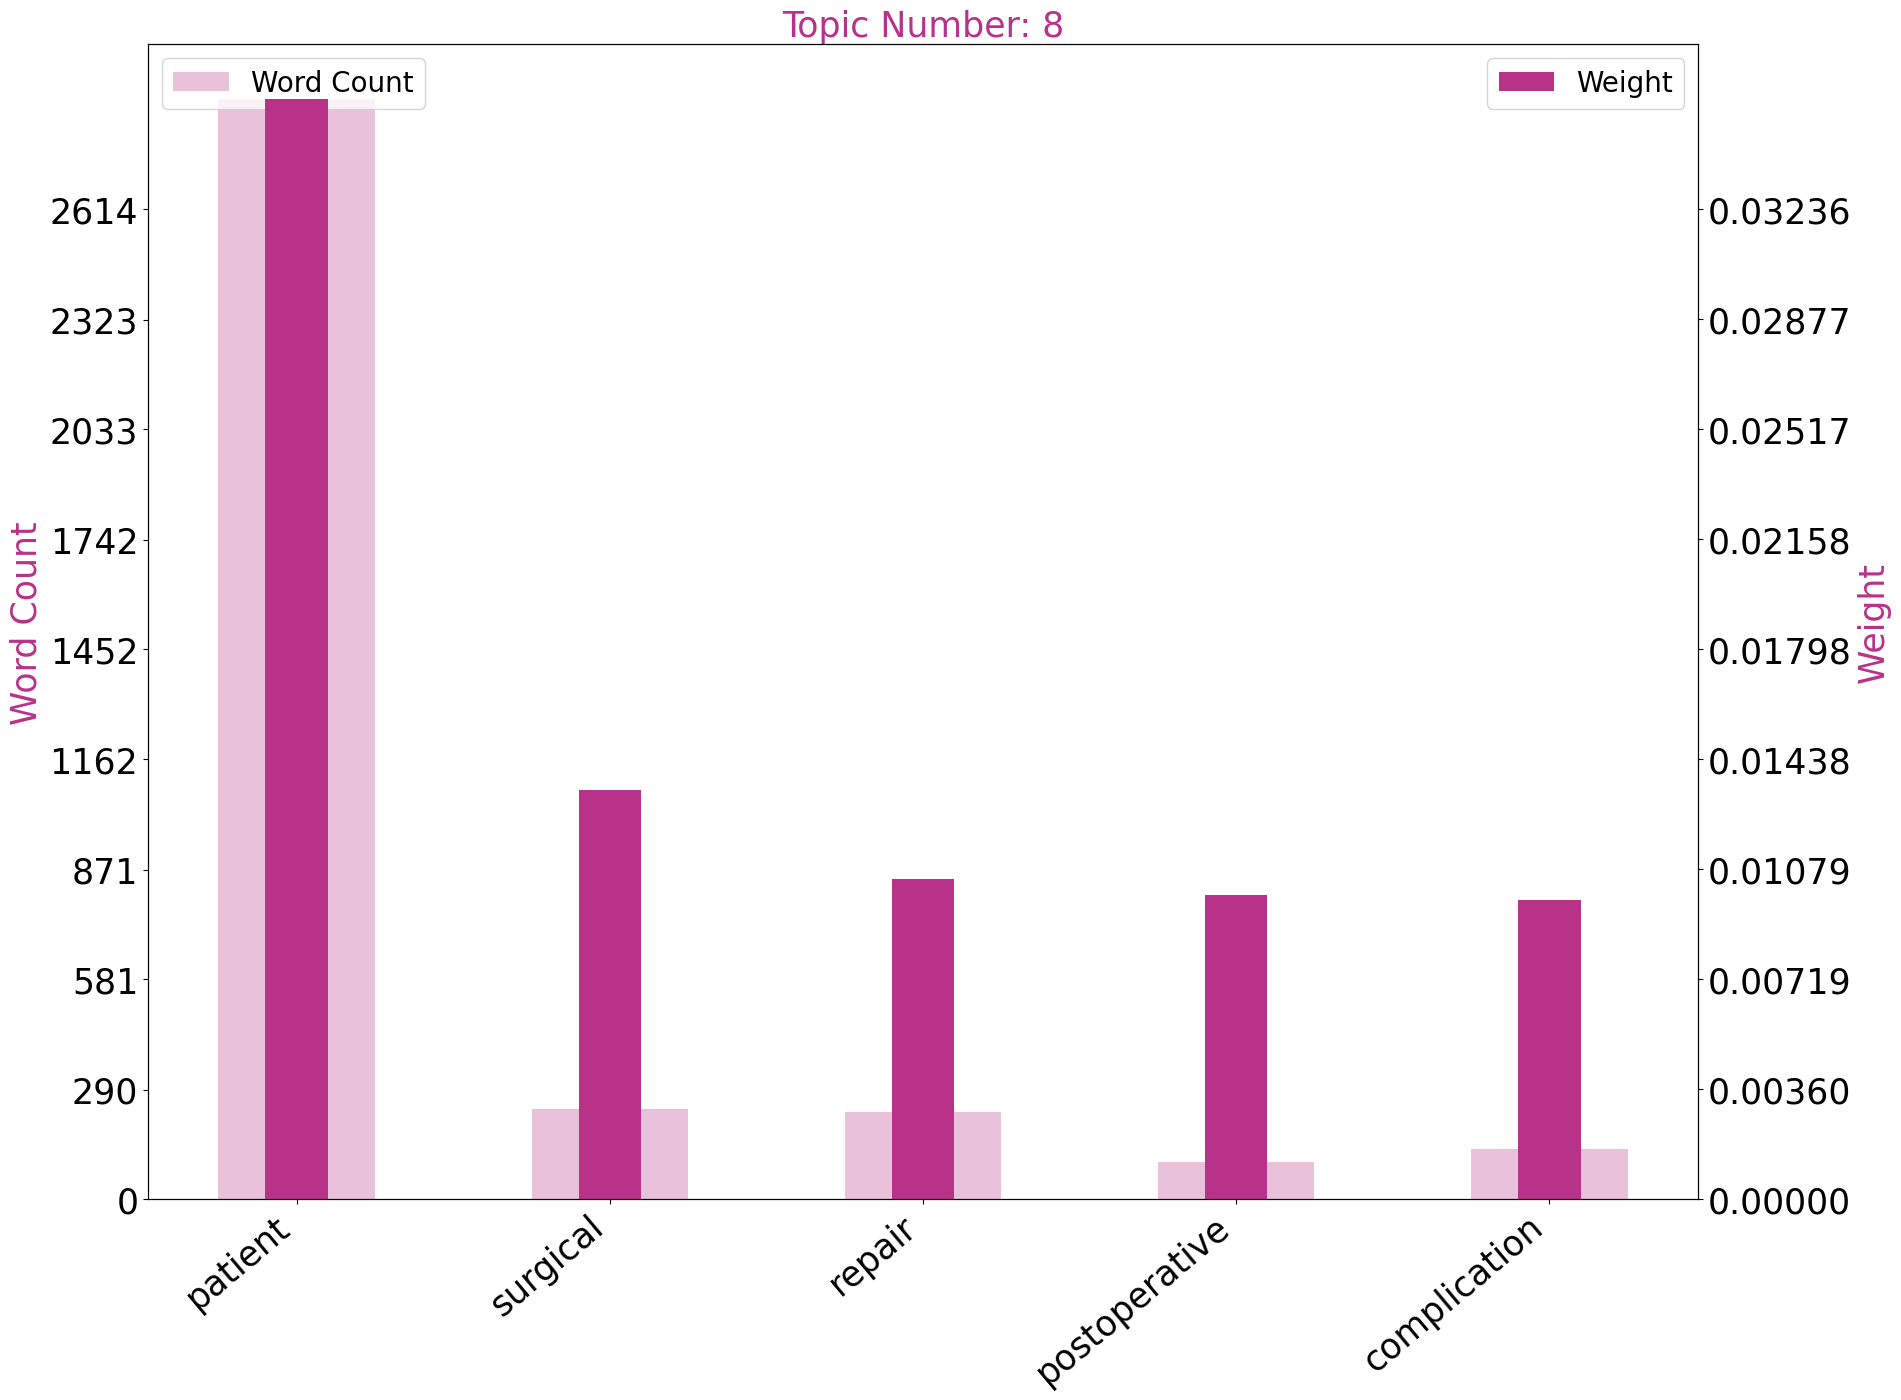

In [ ]:
'''The pre_processing() function creates the log folder where the abstracts will be stored and the status_logger'''
# abstracts_log_name, status_logger_name = pre_processing(keywords_to_search)

'''Here, we use scraper_main() to retrieve the abstracts'''
# scraper_main(keywords_to_search, abstracts_log_name, status_logger_name)

'''Here, we use cleaner_main() to clean the abstracts collected'''
cleaner_main(abstracts_log_name, status_logger_name)

'''Here, we use analyzer_main() to tabulate the frequency of occurance of various words'''
analyzer_main(abstracts_log_name, status_logger_name)

'''Here, we use nlp_engine_main() to train the language model and present the topic modelling results'''
nlp_engine_main(abstracts_log_name, status_logger_name, num_topics, num_keywords)

# Full text analysis

https://github.com/gereltuya/ai-for-climate-action/tree/714bf06d52bcb984510a5b12f57eb127d1be5e88

In [ ]:
from pyResearchInsights.Cleaner import cleaner_main

abstracts_log_name = "./LOGS/log/abstracts.txt"
status_logger_name = "test_run"
cleaner_main(abstracts_log_name, status_logger_name)

In [ ]:
from pyResearchInsights.Analyzer import analyzer_main

abstracts_log_name = "./LOGS/log/abstracts_CLEANED.txt"
status_logger_name = "test_run"
analyzer_main(abstracts_log_name, status_logger_name)

In [ ]:
from pyResearchInsights.NLP_Engine import nlp_engine_main
abstracts_log_name = "./LOGS/log/abstracts_CLEANED.txt"
status_logger_name = "test_run"
nlp_engine_main(abstracts_log_name, status_logger_name)

#Extracting information from fulltexts

In [ ]:
import platform
import os
import openai
import re

import torch
import transformers
from transformers import AutoTokenizer

print('Python: ', platform.python_version())
print('re: ', re.__version__)
print('torch: ', torch.__version__)
print('transformers: ', transformers.__version__)